#### S09 T02: Aprenentatge Supervisat - Regressions part 2

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.10f}'.format)

I will load again the dataset from the previous exercise called data and I will apply again dummy transformation here because it takes less memory space if I do it this way (because of dtypes of the dummy columns). I could also change dtypes from here but it takes a lot of time so it is faster doing it this way. 

In [2]:
# open dataset from the previous exercise 
data = pd.read_csv('data.csv')
data.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest
0,-14.0000000000,128.0000000000,150.0000000000,116.0000000000,8.0000000000,810,418.9700000000,4.0000000000,8.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2003.0000000000,1955,2211.0000000000,2225,1,3,4,WN,IAD,TPA
1,2.0000000000,128.0000000000,145.0000000000,113.0000000000,19.0000000000,810,430.0900000000,5.0000000000,10.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,754.0000000000,735,1002.0000000000,1000,1,3,4,WN,IAD,TPA
2,14.0000000000,96.0000000000,90.0000000000,76.0000000000,8.0000000000,515,406.5800000000,3.0000000000,17.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,628.0000000000,620,804.0000000000,750,1,3,4,WN,IND,BWI
3,34.0000000000,90.0000000000,90.0000000000,77.0000000000,34.0000000000,515,401.3000000000,3.0000000000,10.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000,32.0000000000,1829.0000000000,1755,1959.0000000000,1925,1,3,4,WN,IND,BWI
4,11.0000000000,101.0000000000,115.0000000000,87.0000000000,25.0000000000,688,474.4800000000,4.0000000000,10.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1940.0000000000,1915,2121.0000000000,2110,1,3,4,WN,IND,JAX


In [3]:
# do the sample explained in previous exercise 
data_sample = data.groupby('UniqueCarrier', group_keys= False).apply(lambda x : x.sample(frac=0.1, random_state = 0))

In [4]:

# now i will generate the dummy columns that are already explained in the previous exercise 
# create a column to categorize ArrDelay, explained in previous exercise
def delay_interval(x): 
    if x < 15: 
        return "Less than 15"
    elif x < 30: 
        return "Between 15 and 30"
    elif x < 60: 
        return "Between 30 and 60"
    else: 
        return "More than 60"

data_sample['DelayInterval'] = data_sample['ArrDelay'].apply(delay_interval)
data_sample.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,DelayInterval
143019,21.0000000000,95.0000000000,88.0000000000,63.0000000000,14.0000000000,364,346.6700000000,11.0000000000,21.0000000000,14.0000000000,0.0000000000,7.0000000000,0.0000000000,0.0000000000,1711.0000000000,1657,1746.0000000000,1725,1,18,5,9E,DTW,EVV,Between 15 and 30
1886001,24.0000000000,139.0000000000,126.0000000000,105.0000000000,11.0000000000,813,464.5700000000,18.0000000000,16.0000000000,0.0000000000,0.0000000000,13.0000000000,0.0000000000,11.0000000000,1100.0000000000,1049,1419.0000000000,1355,12,5,5,9E,AUS,ATL,Between 15 and 30
1881989,2.0000000000,86.0000000000,102.0000000000,65.0000000000,18.0000000000,490,452.3100000000,9.0000000000,12.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,943.0000000000,925,1209.0000000000,1207,12,22,1,9E,RAP,MSP,Less than 15
1030789,37.0000000000,114.0000000000,90.0000000000,87.0000000000,13.0000000000,442,304.8300000000,4.0000000000,23.0000000000,13.0000000000,0.0000000000,24.0000000000,0.0000000000,0.0000000000,1908.0000000000,1855,2102.0000000000,2025,6,12,4,9E,MEM,MLI,Between 30 and 60
687997,10.0000000000,90.0000000000,88.0000000000,61.0000000000,8.0000000000,382,375.7400000000,7.0000000000,22.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1038.0000000000,1030,1208.0000000000,1158,4,1,2,9E,DTW,ROA,Less than 15


In [5]:
# creating the dummy columns 
# we´ll use the param drop first = True so we don t have duplicated information 
data_sample= pd.get_dummies(data = data_sample, columns = ['UniqueCarrier','Origin', 'Dest'], 
                            drop_first= True)
# map dummies for DelayInterval
data_sample['DelayInterval'] = data_sample['DelayInterval'].map({"Less than 15": 0, "Between 15 and 30": 1, 
                         "Between 30 and 60" : 2, "More than 60": 3})
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192825 entries, 143019 to 1544585
Columns: 637 entries, ArrDelay to Dest_YUM
dtypes: float64(15), int64(7), uint8(615)
memory usage: 146.9 MB


Now I will delete the columns that show multicollinearity (explained in the previous Notebook on the VIF process)

In [6]:
data_cleaned = data_sample.copy()

In [7]:
data_cleaned.drop(['ActualElapsedTime', 'CRSElapsedTime', 'TaxiIn', 'LateAircraftDelay', 'AirTime', 
                   'CRSDepTime', 'Speed', 'CRSArrTime', 'DepTime'], axis = 1, inplace = True)
data_cleaned.shape

(192825, 628)

Now we have the same dataset that we had at the end of our previous Notebook. 

### Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

To improve our predictions, we could scale our data, let´s check the data: 

In [8]:
data_scaled = data_cleaned.copy()

In [9]:
data_scaled.head()

,ArrDelay,DepDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,ArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest

In [10]:
data_scaled.columns[:16]

Index(['ArrDelay', 'DepDelay', 'Distance', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'ArrTime', 'Month',
       'DayofMonth', 'DayOfWeek', 'DelayInterval', 'UniqueCarrier_AA',
       'UniqueCarrier_AQ', 'UniqueCarrier_AS'],
      dtype='object')

We can scale the data in different ways: 

+ We can use RobustScaler on those features that refer to delay and have heavy outliers: 'ArrDelay', 'DepDelay', 'Distance', 'TaxiOut', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay'
+ We can use MinMaxScaler with those features that refer to the time of the flight, these features don't have outliers: 'ArrTime', 'Month','DayofMonth', 'DayOfWeek', they refer to the dates and hours of the flights. 

We won' t scale dummy columns. 

#### Robust Scaler

In [11]:
cols_robust = ['ArrDelay', 'DepDelay', 'Distance', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay']

In [12]:
data_scaled[cols_robust].describe().round(2)

,ArrDelay,DepDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay
count,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000
mean,42.2200000000,43.1300000000,765.2800000000,18.2300000000,12.2900000000,2.3900000000,9.7100000000,0.0600000000
std,56.9200000000,53.5600000000,573.9400000000,14.2300000000,35.8100000000,17.9000000000,28.2100000000,1.8200000000
min,-59.0000000000,6.0000000000,31.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,9.0000000000,12.0000000000,338.0000000000,10.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,24.0000000000,24.0000000000,606.0000000000,14.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,56.0000000000,53.0000000000,998.0000000000,21.0000000000,10.0000000000,0.0000000000,6.0000000000,0.0000000000
max,1655.0000000000,1597.0000000000,4962.0000000000,356.0000000000,1312.0000000000,1148.0000000000,1289.0000000000,392.0000000000


Comparing max values and quartiles we can see we have outliers in this columns, let´s draw some boxplots to confirm this.

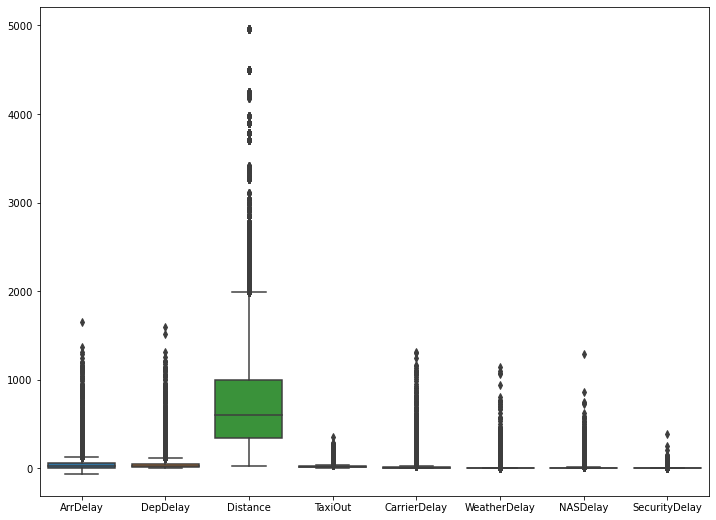

In [13]:
plt.figure(figsize=(12,9))
sns.boxplot(data = data_scaled[cols_robust]); 

Some features have more outliers than others, but let´s try this approach and see how it works: 

In [14]:
#import libraries 
from sklearn import preprocessing

robust_scaler = preprocessing.RobustScaler()
#apply robust scaler on selected columns
data_scaled[cols_robust] = robust_scaler.fit_transform(data_scaled[cols_robust])

In [15]:
data_scaled.head()

,ArrDelay,DepDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,ArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest

In [16]:
data_scaled[cols_robust].describe().round(2)

,ArrDelay,DepDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay
count,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000
mean,0.3900000000,0.4700000000,0.2400000000,0.3800000000,1.2300000000,2.3900000000,1.6200000000,0.0600000000
std,1.2100000000,1.3100000000,0.8700000000,1.2900000000,3.5800000000,17.9000000000,4.7000000000,1.8200000000
min,-1.7700000000,-0.4400000000,-0.8700000000,-1.2700000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,-0.3200000000,-0.2900000000,-0.4100000000,-0.3600000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,0.6800000000,0.7100000000,0.5900000000,0.6400000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000
max,34.7000000000,38.3700000000,6.6000000000,31.0900000000,131.2000000000,1148.0000000000,214.8300000000,392.0000000000


We see the data has been scaled in a way that preserves the information about outliers. 

#### MinMax Scaler

For the columns that refer to the time of the flight ('ArrTime', 'Month', 'DayofMonth','DayOfWeek',) I will use MinMaxScaler. 

In [17]:
from sklearn.preprocessing import MinMaxScaler

cols_minmax = ['ArrTime', 'Month', 'DayofMonth','DayOfWeek', 'DelayInterval']

mms = MinMaxScaler()
# apply scaler on selected features
data_scaled[cols_minmax] = mms.fit_transform(data_scaled[cols_minmax])

In [18]:
data_scaled[cols_minmax].describe().round(2)

,ArrTime,Month,DayofMonth,DayOfWeek,DelayInterval
count,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000,192825.0000000000
mean,0.6700000000,0.4700000000,0.4900000000,0.5000000000,0.4400000000
std,0.2300000000,0.3200000000,0.2900000000,0.3300000000,0.3900000000
min,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.5500000000,0.1800000000,0.2300000000,0.1700000000,0.0000000000
50%,0.7100000000,0.4500000000,0.5000000000,0.5000000000,0.3300000000
75%,0.8500000000,0.7300000000,0.7300000000,0.8300000000,0.6700000000
max,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


Now these features have all a min value of 0 and max value of 1. 

In [19]:
data_scaled.head()

,ArrDelay,DepDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,ArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest

Now let´s test our models with the scaled data. 

#### Model 1 : Simple Linear Regression

First we will apply scaled features on our Simple Linear Regression model where we are using only 2 variables: 

In [20]:
# declare dependent variable 
y_simple_scaled = data_scaled['ArrDelay']
# independent variable 
x_simple_scaled = data_scaled['DepDelay']

In [21]:
# since the input has only 1 dimension, (1 feature), we reshape first
x_simple_scaled = x_simple_scaled.values.reshape(-1, 1)
x_simple_scaled.shape

(192825, 1)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# we´ll use a test size of 30%
# use the same random_state as before 
x_simple_train_scaled, x_simple_test_scaled, y_simple_train_scaled, y_simple_test_scaled = train_test_split(x_simple_scaled, 
                                       y_simple_scaled, test_size= 0.3, random_state= 10)

In [23]:
# regression 
scaled_regression = LinearRegression()
scaled_regression.fit(x_simple_train_scaled, y_simple_train_scaled)

LinearRegression()

In [24]:
# import modules for the metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [25]:
# functions to show the results 
def print_results_test(true, predicted): 
    
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    print('R2 for test set : ', r2_square)
    print('MSE (mean squared error) for test set: ', mse)
    print('------------------------------------------')
    
def print_results_train(true, predicted): 
    
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    print('R2 for train set : ', r2_square)
    print('MSE (mean squared error) for train set: ', mse)

In [26]:
#predictions for test sets 
scaled_reg_test_pred = scaled_regression.predict(x_simple_test_scaled)
# predcitions for train 
scaled_reg_train_pred = scaled_regression.predict(x_simple_train_scaled)

In [27]:
print_results_test(y_simple_test_scaled, scaled_reg_test_pred)
print_results_train(y_simple_train_scaled, scaled_reg_train_pred)

R2 for test set :  0.9095964548101837
MSE (mean squared error) for test set:  0.13149831985240448
------------------------------------------
R2 for train set :  0.9098436088946703
MSE (mean squared error) for train set:  0.13269306321908042


In [28]:
# define a function to get the results to a dataframe: 
def get_results(true, predicted): 
    r2_square = metrics.r2_score(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    
    return r2_square, mse    

In [29]:
# we will save the results in a dataframe 
scaled_results = pd.DataFrame(data =[['Simple Linear Regression', 
                                     get_results(y_simple_test_scaled, scaled_reg_test_pred)[0], 
                                     get_results(y_simple_test_scaled, scaled_reg_test_pred)[1], 
                                     get_results(y_simple_train_scaled, scaled_reg_train_pred)[0], 
                                     get_results(y_simple_train_scaled, scaled_reg_train_pred)[1]]], 
                                     columns = ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
scaled_results

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.9095964548,0.1314983199,0.9098436089,0.1326930632


If we compare this with our previous model: 

In [30]:
# compare with previous model: 
# open results_df with previous results
results_df = pd.read_csv('results_df.csv')
results_df[0:1]

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.9095964548,290.4797885540,0.9098436089,293.1189766509


+ The results we got in R2 are exactly the same!!! This is logical because both ArrDelay and DepDelay are in the same scale and we have scaled them equally, since in this model we only got these two features the result is the same. 
+ MSE  cannot be compared because the scale is different

#### Model 2 : Ridge Regression 

In this model again we will use all the features that were kept after VIF analyisis. 

In [31]:
# dependent variable 
y_scaled = data_scaled['ArrDelay']
# independent features 
X_scaled = data_scaled.drop(['ArrDelay'], axis = 1)

In [32]:
print('data_scaled.shape: ', data_scaled.shape)
print('X_scaled.shape: ', X_scaled.shape)
print('y_scaled.shape: ', y_scaled.shape)

data_scaled.shape:  (192825, 628)
X_scaled.shape:  (192825, 627)
y_scaled.shape:  (192825,)


In [33]:
# use test size of 0.3
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, 
                                                        test_size= 0.3, random_state= 0)

In [34]:
print('X_train_scaled.shape: ' , X_train_scaled.shape)
print('X_test_scaled.shape: ', X_test_scaled.shape)
print('y_train_scaled.shape: ', y_train_scaled.shape)
print('y_test_scaled.shape: ', y_test_scaled.shape)

X_train_scaled.shape:  (134977, 627)
X_test_scaled.shape:  (57848, 627)
y_train_scaled.shape:  (134977,)
y_test_scaled.shape:  (57848,)


In [35]:
from sklearn.linear_model import Ridge

scaled_ridge = Ridge()
scaled_ridge.fit(X_train_scaled, y_train_scaled)

Ridge()

In [36]:
scaled_ridge_test_prediction = scaled_ridge.predict(X_test_scaled)
scaled_ridge_train_prediction = scaled_ridge.predict(X_train_scaled)

print_results_test(y_test_scaled, scaled_ridge_test_prediction)
print_results_train(y_train_scaled, scaled_ridge_train_prediction)

R2 for test set :  0.9728951593612505
MSE (mean squared error) for test set:  0.039633283165410385
------------------------------------------
R2 for train set :  0.9729783614904497
MSE (mean squared error) for train set:  0.03968255427364781


In [37]:
# recall results from the first model 
results_df[1:2]

,Model,R2_test,MSE_test,R2_train,MSE_train
1,Ridge Regression,0.9728951602,87.5499197516,0.9729783617,87.6587618537


For ridge model the results are the same, scaling the features has no effect on R2 (MSE is not comparable)

In [38]:
# store the results 
scaled_ridge = pd.DataFrame(data = [['Ridge Regression', 
                                    get_results(y_test_scaled, scaled_ridge_test_prediction)[0], 
                                    get_results(y_test_scaled, scaled_ridge_test_prediction)[1], 
                                    get_results(y_train_scaled, scaled_ridge_train_prediction)[0], 
                                    get_results(y_train_scaled, scaled_ridge_train_prediction)[1]]], 
                                    columns = ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
scaled_results = pd.concat([scaled_results, scaled_ridge])
scaled_results

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.9095964548,0.1314983199,0.9098436089,0.1326930632
0,Ridge Regression,0.9728951594,0.0396332832,0.9729783615,0.0396825543


#### Model 3 : Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
# choose n_estimators to 50
scaled_regressor = RandomForestRegressor(n_estimators= 50, random_state= 0)
scaled_regressor.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(n_estimators=50, random_state=0)

In [40]:
scaled_forest_test_prediction = scaled_regressor.predict(X_test_scaled)
scaled_forest_train_prediction = scaled_regressor.predict(X_train_scaled)

print_results_test(y_test_scaled, scaled_forest_test_prediction)
print_results_train(y_train_scaled, scaled_forest_train_prediction)

R2 for test set :  0.9881189928626017
MSE (mean squared error) for test set:  0.017372665142830097
------------------------------------------
R2 for train set :  0.9982919395442333
MSE (mean squared error) for train set:  0.002508367570481544


In [41]:
# comparing with previous results: 
results_df[2:3]

,Model,R2_test,MSE_test,R2_train,MSE_train
2,Random Forest Regression,0.9881187248,38.3770832457,0.9982827110,5.5709214014


We can see that our results improve but very litle!! we have to look up to the 7th decimal to notice the improvement. We have to take into account our R2 is actually really high and may be difficult to increase it much more. 

In [42]:
#df.round(decimals=number of decimal places needed)
# save results 
scaled_forest = pd.DataFrame( data = [['Random Forest Regression', 
                                      get_results(y_test_scaled, scaled_forest_test_prediction)[0], 
                                      get_results(y_test_scaled, scaled_forest_test_prediction)[1], 
                                      get_results(y_train_scaled, scaled_forest_train_prediction)[0], 
                                      get_results(y_train_scaled, scaled_forest_train_prediction)[1]]], 
                                      columns = ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
scaled_results = pd.concat([scaled_results, scaled_forest])
scaled_results

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.9095964548,0.1314983199,0.9098436089,0.1326930632
0,Ridge Regression,0.9728951594,0.0396332832,0.9729783615,0.0396825543
0,Random Forest Regression,0.9881189929,0.0173726651,0.9982919395,0.0025083676


#### Model 4: XGBoost Regressor

In [43]:
from xgboost import XGBRegressor

xgb_scaled_regressor = XGBRegressor()

xgb_scaled_regressor.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
scaled_xgb_test_prediction = xgb_scaled_regressor.predict(X_test_scaled)
scaled_xgb_train_prediction = xgb_scaled_regressor.predict(X_train_scaled)

print_results_test(y_test_scaled, scaled_xgb_test_prediction)
print_results_train(y_train_scaled, scaled_xgb_train_prediction)

R2 for test set :  0.988296972800585
MSE (mean squared error) for test set:  0.0171124190349901
------------------------------------------
R2 for train set :  0.9913340014958506
MSE (mean squared error) for train set:  0.012726428704710743


In [45]:
# look at previous result: 
results_df[3:4]

,Model,R2_test,MSE_test,R2_train,MSE_train
3,XGBoost Regression,0.9882029254,38.1051112017,0.9913355160,28.1077679962


We see a little improvement in R2 in test set but not in train set. 

In [46]:
# store the results 
scaled_xgb = pd.DataFrame(data = [['XGBoost Regression', 
                                  get_results(y_test_scaled, scaled_xgb_test_prediction)[0], 
                                  get_results(y_test_scaled, scaled_xgb_test_prediction)[1], 
                                  get_results(y_train_scaled, scaled_xgb_train_prediction)[0], 
                                  get_results(y_train_scaled, scaled_xgb_train_prediction)[1]]], 
                                  columns = ['Model', 'R2_test', 'MSE_test', 'R2_train', 'MSE_train'])
scaled_results = pd.concat([scaled_results, scaled_xgb])
scaled_results

,Model,R2_test,MSE_test,R2_train,MSE_train
0,Simple Linear Regression,0.9095964548,0.1314983199,0.9098436089,0.1326930632
0,Ridge Regression,0.9728951594,0.0396332832,0.9729783615,0.0396825543
0,Random Forest Regression,0.9881189929,0.0173726651,0.9982919395,0.0025083676
0,XGBoost Regression,0.9882969728,0.0171124190,0.9913340015,0.0127264287


Let´s put together the scaled results with the results from the first models to compare them: 

In [47]:
# put together the 2 dataframes row by row 
compared_df = results_df[0:4].stack().to_frame('results_df')
compared_df.loc[:, 'scaled_results'] = scaled_results.stack().values
compared_df = compared_df.stack().unstack(1)
compared_df

Model      R2_test       MSE_test  \
0 results_df      Simple Linear Regression 0.9095964548 290.4797885540   
  scaled_results  Simple Linear Regression 0.9095964548   0.1314983199   
1 results_df              Ridge Regression 0.9728951602  87.5499197516   
  scaled_results          Ridge Regression 0.9728951594   0.0396332832   
2 results_df      Random Forest Regression 0.9881187248  38.3770832457   
  scaled_results  Random Forest Regression 0.9881189929   0.0173726651   
3 results_df            XGBoost Regression 0.9882029254  38.1051112017   
  scaled_results        XGBoost Regression 0.9882969728   0.0171124190   

                     R2_train      MSE_train  
0 results_df     0.9098436089 293.1189766509  
  scaled_results 0.9098436089   0.1326930632  
1 results_df     0.9729783617  87.6587618537  
  scaled_results 0.9729783615   0.0396825543  
2 results_df     0.9982827110   5.5709214014  
  scaled_results 0.9982919395   0.0025083676  
3 results_df     0.9913355160  28.1077679962  
  scaled_results 0.9913340015   0.0127264287

+ In Simple Linear Regression and Ridge Regression results are the same (a little lower in the case of Ridge but we have to look at the 8th decimal to notice) 
+ In Random Forest and XGBoost the results are a little better with scaled features (but we have to look from the 5th decimal)

Maybe in our models these improvements don' t matter too much because R2 is already quite high, but this is a tool that maybe can improve the prediction of a model when the features are in different scales.

### - Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

We have seen in our Simple Linear Regression model that 'DepDelay' alone has a R2 of 0.9, so if we remove it we are losing an important feature to predict 'ArrDelay'. 

We will use the dataset data_sample that has all the features, if we remove 'ArrDelay' we will have to make VIF analysis again to evaluate multicollinearity. 

First we will drop the feature 'DepDelay'. 

In [48]:
data_sample.head()

,ArrDelay,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Speed,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,Month,DayofMonth,DayOfWeek,DelayInterval,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,D

In [49]:
data_sample.shape

(192825, 637)

In [50]:
data_final = data_sample.copy()

In addition to 'DepDelay' we will also delete 'DelayInterval' since contains info about 'ArrDelay' but categorized (this column I created it in the first exercise) 

In [51]:
# drop 'DepDelay' and 'DelayInterval'
data_final.drop(['DepDelay', 'DelayInterval'], axis = 1, inplace= True)

In [52]:
data_final.shape

(192825, 635)

In [53]:
data_final.columns[1:22]

Index(['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'Speed',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth', 'DayOfWeek',
       'UniqueCarrier_AA', 'UniqueCarrier_AQ'],
      dtype='object')

In [54]:
# features to evaluate multicollinearity: 
cols = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'Distance', 'Speed',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth', 'DayOfWeek']

In [55]:
# import module to evaluate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we ´ll define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

In [56]:
calculate_vif(data_final, cols)

,VIF,features
0,inf,ActualElapsedTime
1,245.7363588775,CRSElapsedTime
2,inf,AirTime
3,94.9029457809,Distance
4,31.1451418154,Speed
5,inf,TaxiIn
6,inf,TaxiOut
7,1.1618265398,CarrierDelay
8,1.0397106665,WeatherDelay
9,1.6318301006,NASDelay


+ delete 'ActualElapsedTime'. 'TaxiIn', 'CRSDepTime' (we can delete them together because they are not correlated between each other)

In [57]:
data_final.drop([ 'ActualElapsedTime','TaxiIn', 'CRSDepTime'], axis = 1, inplace = True)
data_final.shape

(192825, 632)

In [58]:
# evaluate vif again with remaining columns
cols =  ['CRSElapsedTime', 'AirTime', 'Distance', 'Speed', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepTime',  'ArrTime', 'CRSArrTime', 'Month', 'DayofMonth', 'DayOfWeek']
calculate_vif(data_final, cols)

,VIF,features
0,236.7007283891,CRSElapsedTime
1,198.4662078866,AirTime
2,92.9733222219,Distance
3,30.4784076721,Speed
4,3.7614264099,TaxiOut
5,1.1431276021,CarrierDelay
6,1.0359750747,WeatherDelay
7,1.5077971384,NASDelay
8,1.0014669259,SecurityDelay
9,1.2842450547,LateAircraftDelay


+ drop 'CRSElapsedTime', 'CRSArrTime'

In [59]:
data_final.drop([ 'CRSElapsedTime', 'CRSArrTime'], axis = 1, inplace = True)
data_final.shape

(192825, 630)

In [60]:
cols =  [ 'AirTime', 'Distance', 'Speed', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'DepTime',  'ArrTime', 'Month', 'DayofMonth', 'DayOfWeek']
calculate_vif(data_final, cols)

,VIF,features
0,96.2884375751,AirTime
1,86.0591888458,Distance
2,25.7105627114,Speed
3,3.3276291404,TaxiOut
4,1.1398150462,CarrierDelay
5,1.0353867745,WeatherDelay
6,1.4666311527,NASDelay
7,1.0012801849,SecurityDelay
8,1.2788338071,LateAircraftDelay
9,15.9393363281,DepTime


+ drop 'AirTime' and 'DepTime'

In [61]:
data_final.drop(['AirTime','DepTime'], axis = 1, inplace= True)
data_final.shape

(192825, 628)

In [62]:
cols =  ['Distance', 'Speed', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'ArrTime', 'Month', 'DayofMonth', 'DayOfWeek']
calculate_vif(data_final, cols)

,VIF,features
0,4.3572211651,Distance
1,21.3171591452,Speed
2,3.2864654499,TaxiOut
3,1.1300343585,CarrierDelay
4,1.0325927511,WeatherDelay
5,1.4300775947,NASDelay
6,1.0011940839,SecurityDelay
7,1.2142223966,LateAircraftDelay
8,8.3143713897,ArrTime
9,3.9409143736,Month


+ Lastly, we will drop 'Speed'. 

In [63]:
data_final.drop(['Speed'], axis = 1, inplace= True)
data_final.shape

(192825, 627)

In [64]:
cols =  ['Distance', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'ArrTime', 'Month', 'DayofMonth', 'DayOfWeek']

calculate_vif(data_final, cols)

,VIF,features
0,2.5976295963,Distance
1,3.1706768437,TaxiOut
2,1.1263764712,CarrierDelay
3,1.0325659941,WeatherDelay
4,1.3993505497,NASDelay
5,1.0011875757,SecurityDelay
6,1.2062993968,LateAircraftDelay
7,5.9749557045,ArrTime
8,3.6347775313,Month
9,3.7528621858,DayofMonth


Now all of the features have a VIF under 10. 

+ Random Forest and XGBoost have been the models with better performance. 
+ I will choose for this exercise XGBoost  because its prediction power is as good as Random Forest but it recquires much less computational power (aprox 5 times faster than Random Forest). 

In [65]:
data_final.head()

,ArrDelay,Distance,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrTime,Month,DayofMonth,DayOfWeek,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,

In [66]:
y = data_final['ArrDelay']
X = data_final.drop(['ArrDelay'], axis = 1)

In [67]:
print('data_final.shape: ' , data_final.shape)
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

data_final.shape:  (192825, 627)
X.shape:  (192825, 626)
y.shape:  (192825,)


In [68]:
# use test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [69]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (134977, 626)
X_test.shape:  (57848, 626)
y_train.shape:  (134977,)
y_test.shape:  (57848,)


#### XGBoost Regression model 

Let´s see how well it performs our model without 'DepDelay' feature. 

In [70]:
import xgboost as xgb

regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
xgb_test_prediction = regressor.predict(X_test)
xgb_train_prediction = regressor.predict(X_train)

print_results_test(y_test, xgb_test_prediction)
print_results_train(y_train, xgb_train_prediction)

R2 for test set :  0.987861778128612
MSE (mean squared error) for test set:  39.20703310680892
------------------------------------------
R2 for train set :  0.9936557755501771
MSE (mean squared error) for train set:  20.5807972526312


This model shows quite good results in R2, let´s compare with our previous results: 

In [72]:
# comparing this results with the results we got the first time we applied XGBRegressor 
results_df[3:4]

,Model,R2_test,MSE_test,R2_train,MSE_train
3,XGBoost Regression,0.9882029254,38.1051112017,0.9913355160,28.1077679962


+ Deleting 'DepDelay' has caused the R2 to increase a little in train set but dicrease in test set
+ MSE is lower in train without 'DepDelay' but higher in test set.

Let´s draw actual vs predicted values both in test and train set: 

In [73]:
# df actual vs predicted in test and train
XGB_test_df = pd.DataFrame({'y_test': y_test, 'test_predictions' : xgb_test_prediction})
XGB_train_df = pd.DataFrame({'y_train' : y_train, 'train_predictions' : xgb_train_prediction})

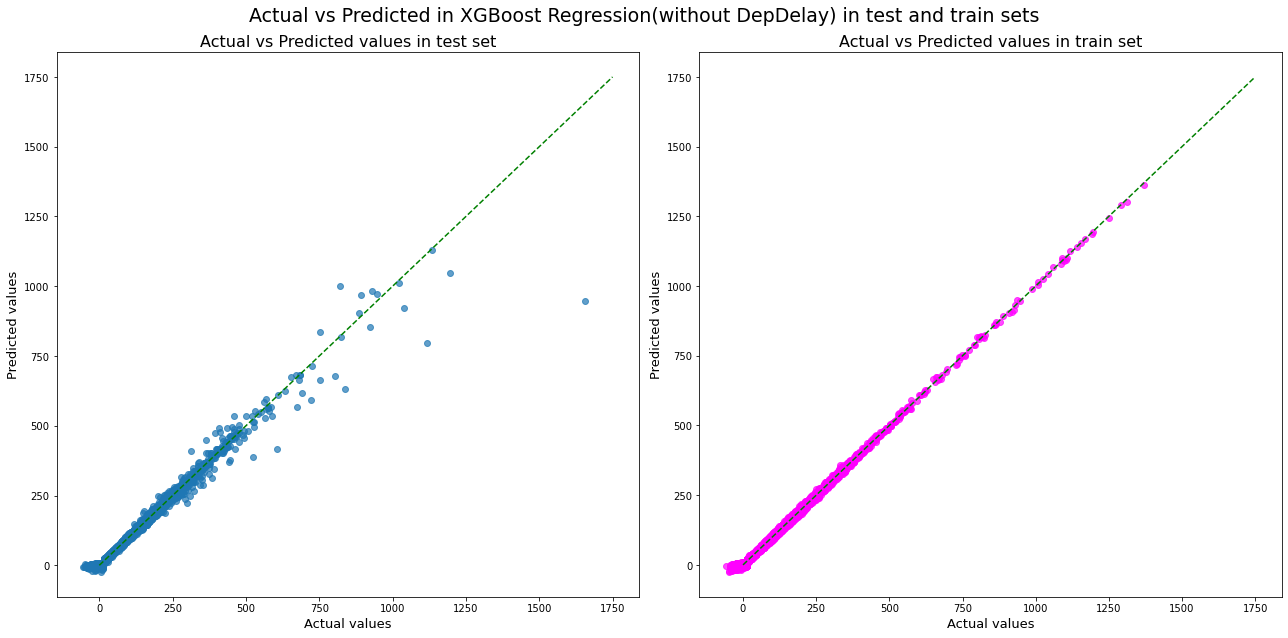

In [74]:
# plot actual vs predicted 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in XGBoost Regression(without DepDelay) in test and train sets', fontsize = 19)

plt.subplot(121)
plt.scatter(x= XGB_test_df['y_test'], y = XGB_test_df['test_predictions'] , alpha = 0.7)
plt.plot([0, 1750], [0, 1750], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test set', fontsize = 16)

plt.subplot(122)
plt.scatter(x=XGB_train_df['y_train'], y = XGB_train_df['train_predictions'], alpha = 0.7, c = 'magenta')
plt.plot([0, 1750], [0, 1750], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train set', fontsize = 16)
plt.tight_layout(); 

+ We observe here the dispersion in test set is much more noticeable compared with the results we got in our models where we used DepDelay. 
+ The errors are more visisble compared with the train set too: the plot is much thinner around the 45° degree line in the train set than in test set.

 Let´s see the distribution of errors in test set:

In [75]:
# create df of errors in test set
XGBoost_errors_df = pd.DataFrame({'Error Values' : (y_test -xgb_test_prediction)})

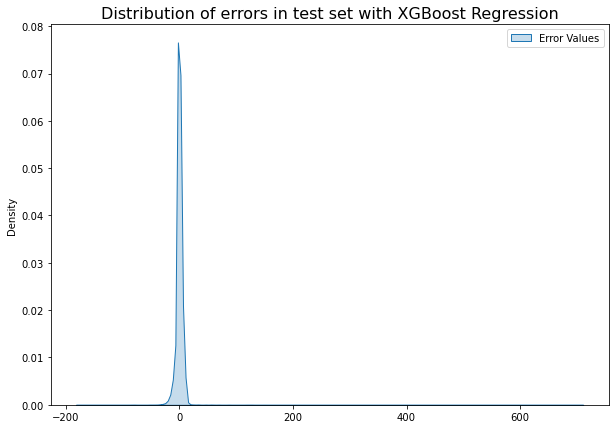

In [76]:
# now we plot it 
plt.figure(figsize=(10, 7))
plt.title('Distribution of errors in test set with XGBoost Regression', fontsize = 16)
sns.kdeplot(data = XGBoost_errors_df, fill = True); 

In [77]:
XGBoost_errors_df.describe().round(2)

,Error Values
count,57848.0000000000
mean,0.0600000000
std,6.2600000000
min,-179.5500000000
25%,-1.5100000000
50%,0.0200000000
75%,1.8000000000
max,708.8200000000


+ The max value of error here is the double of the model when we used DepDelay
+ On the other hand, errors seem concentrated around values around zero. 

#### Cross Validation 

Since this model shows more differences between test and train than the model we used when we used 'depDelay' we will do cross validation now to compare the results. 

In [78]:
from sklearn.model_selection import cross_val_score
# use cv=5, same as before
xgb_reg = XGBRegressor()
xgb_r2_scores = cross_val_score(xgb_reg, X, y, cv = 5)
xgb_r2_scores

array([0.97235609, 0.99097991, 0.98266899, 0.98815041, 0.99189471])

In [79]:
# compute the mean of cv R2
r2_cv_xgb = np.mean(xgb_r2_scores)
r2_cv_xgb

0.9852100210588507

In [81]:
xgb_mse_scores = cross_val_score(xgb_reg, X, y, cv = 5, scoring = 'neg_mean_squared_error')
xgb_mse_scores

array([-108.3043837 ,  -28.13787229,  -64.6892613 ,  -31.22398048,
        -22.1609237 ])

In [82]:
# calculate the mean of mse in cv 
mse_cv_xgb = abs(np.mean(xgb_mse_scores))
mse_cv_xgb

50.90328429413569

Now, let´s compare these results with our previous Cross Validation results:

In [83]:
print('R2 cv without DepDelay: ',  r2_cv_xgb)
print('MSE cv withou DepDelay: ', mse_cv_xgb)
# open the dataframe with cross validation results : 
cv_results = pd.read_csv('cv_results')
# add results from model without 'DepDelay' to our dataframe of cross validation results 
cv_no_depdelay = pd.DataFrame(data= [['XGBoost Regression without DepDelay', r2_cv_xgb, mse_cv_xgb]], 
                             columns = ['Model', 'R2', 'MSE'])
cv_results = pd.concat([cv_results, cv_no_depdelay])
cv_results[3:5]

R2 cv without DepDelay:  0.9852100210588507
MSE cv withou DepDelay:  50.90328429413569


,Model,R2,MSE
3,XGBoost Regression,0.9874545799,40.1445838049
0,XGBoost Regression without DepDelay,0.9852100211,50.9032842941


+ We observe that our R2 now is lower (0.985) and MSE is higher (50.90) than before. 
+ The model loses predcitive power when we delete DepDelay but it still has high predictive power. 
+ This may be explained from the fact that we have a lot of feratures that are hihgly correlated with 'ArrDelay'.

To show which features are important to predict 'ArrDelay' we can do a feature importance analyisis, that shows the importance of each feature. We will order these featutes from more to less important and select the 5 most important features (we will excelude dummy columns) : 

#### Feature importance

In [89]:
X.columns[:11] # select the columns used in last model(we have droped DepDelay), we will exclude dummies

Index(['Distance', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'ArrTime', 'Month', 'DayofMonth',
       'DayOfWeek'],
      dtype='object')

In [90]:
# let's do a feature importance analysis 
regressor.feature_importances_[:11]

array([0.00108322, 0.00068382, 0.2974295 , 0.14345698, 0.20989503,
       0.01257295, 0.27630112, 0.00107032, 0.00073453, 0.00086872,
       0.00030355], dtype=float32)

In [91]:
from sklearn.inspection import permutation_importance
# let´s do a plot with the  5 most important features of our model:

perm_importance = permutation_importance(regressor, X_test, y_test)

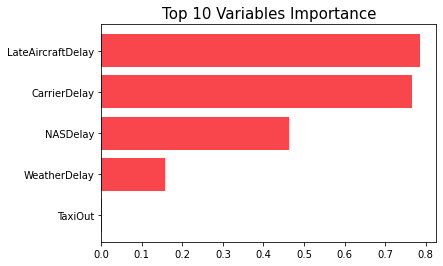

In [92]:
# plot of the 5 most important features in our last model (without DepDelay)
sorted_idx = perm_importance.importances_mean.argsort()[-5:]
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color = '#f8464c')
plt.title('Top 10 Variables Importance', fontsize = 15); 

+ Out of all the features (if we exclude 'DepDelay'), the most important ones in our last model are : LateAircraftDelay, CarrierDelay, NASDelay and WeatherDelay. This makes sense because in the cases where ArrDelay is bigger than 15, the delay is disaggregated between these features (these features are 0 in the cases where ArrDelay is less than 15 minutes).
+ Actually, DepDelay is the sum of these features in the case where ArrDelay is less than 15. 

#### What would happen if we do our model using only these 4 features? 

We will do now our model using only these 4 features and see how it performs. 

In [93]:
# choose dependent variable 
y4 = data_sample['ArrDelay']
# we choose our 4 indeoendent features 
X4 = data_sample[['WeatherDelay', 'NASDelay','LateAircraftDelay','CarrierDelay']]

In [95]:
print('X4.shape: ', X4.shape)
print('yshape:', y.shape)

X4.shape:  (192825, 4)
yshape: (192825,)


In [96]:
# use test size of 0.3 and same random state
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size= 0.3, random_state= 0)

In [97]:
xgb_4regressor = XGBRegressor()
xgb_4regressor.fit(X4_train, y4_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [98]:
xgb4_test_prediction = xgb_4regressor.predict(X4_test)
xgb4_train_prediction = xgb_4regressor.predict(X4_train)

print_results_test(y4_test, xgb4_test_prediction)
print_results_train(y4_train, xgb4_train_prediction)

R2 for test set :  0.9876581318162035
MSE (mean squared error) for test set:  39.86482036735483
------------------------------------------
R2 for train set :  0.9916961446486076
MSE (mean squared error) for train set:  26.93788102136856


Seeing these results, we are able to predict 'ArrDelay' quite well using only 4 features!!

### CONCLUSIONS 

+ We have performed models using all features available and compared the results with models using only some of the features 
+ 'DepDelay' alone can explain 90 % of the variability of the dependent variable 'ArrDelay'. 
+ 'DepDelay' is the sum of 'WeatherDelay', 'NASDelay','LateAircraftDelay','CarrierDelay' when ArrDelay > 15, so using a model with only these 4 features can return pretty good results. 
+ Removing 'DepDelay' does not decrease predictive power considerably because we have other features that measure delay too. In our exploratory exercise we saw that average delay varies depending on other features like Month or Carriers, it could also be interesting to build a model studying these other causes in a deeper way and exclude all the features that refer to delays (idea for another exercise). 
+ Although we have some outliers, the outliers in the important predictors are also outliers in the dependent variable, so the results are not so much affected by outliers (if some of the causes of delay has a big outlier, 'ArrDelay' will be an outlier too in that observation)
+ Scaling the features doesn' t change our model so much since the most important predictors are in the same scale as our dependent variable (scaling improves the best performing models but very little). Besides R2 without scaling is already very high, so there's actually little room for improvement. 
+ Regarding to the models we used, the ones with better results have been Random Forest and XGboost Regressor, but XGBoost is much more efficient with respect to the computational time (5 times faster than Random Forest).
